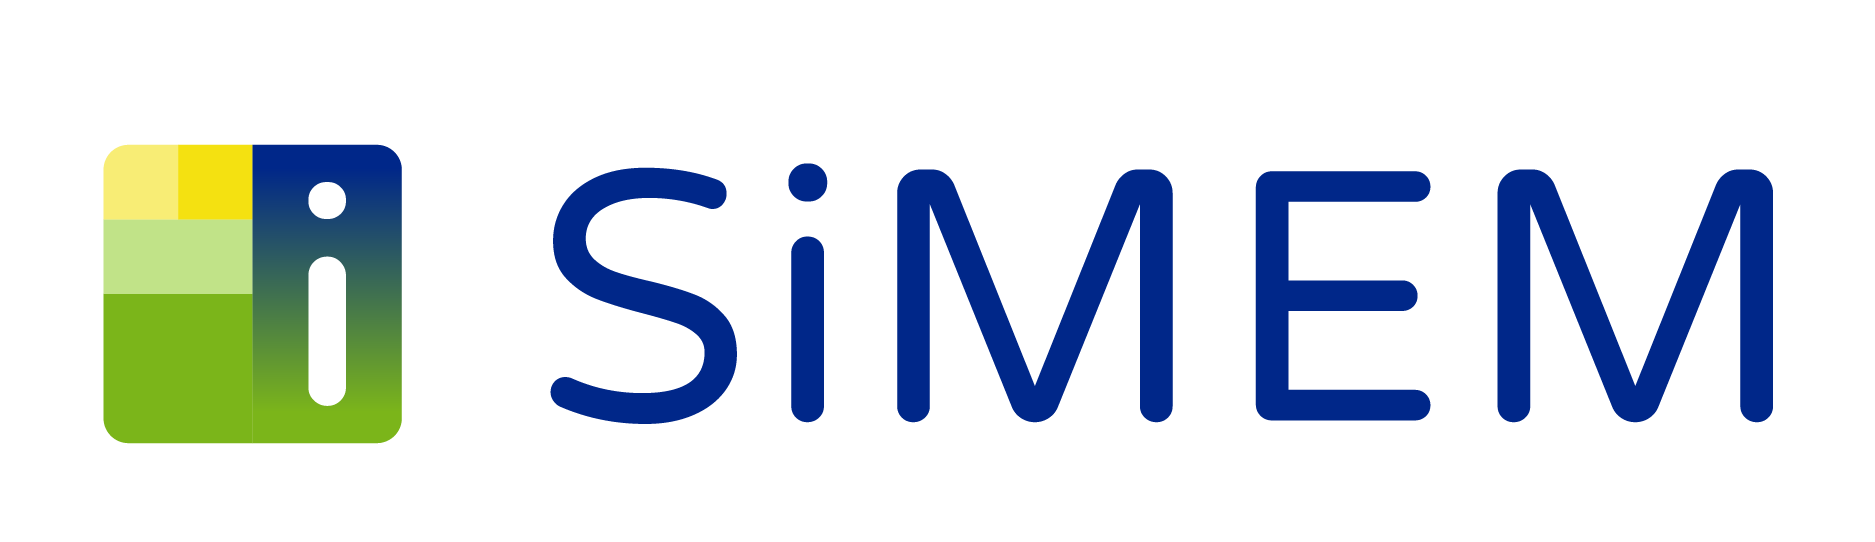

[SiMEM](https://www.simem.co/)

## Caso de uso - Costo promedio ponderado en contratos de largo plazo MC

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [2]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import plotly.graph_objects as go           # Módulo de Plotly para crear visualizaciones interactivas y personalizadas, como gráficos de líneas, barras, áreas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Cantidades y precios en contratos de energía del Mercado Mayorista por comercializador](https://www.simem.co/datadetail/d316478b-b8c0-4050-49ec-08dce7ce0b90) para el período 2022-2024.

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
id_dataset = 'd31647'                                       # ID del conjunto de datos a consultar
fecha_inicial = '2022-01-01'                                # Fecha de inicio del rango de consulta
fecha_final = '2024-12-31'                                  # Fecha de fin del rango de consulta
simem = ReadSIMEM(id_dataset, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_dataset = simem.main()                                   # Ejecución del método principal para obtener los datos en un DataFrame
display(df_dataset.head(20))                                # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Cantidades y precios en contratos de energía del Mercado Mayorista por comercializador"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0009970664978027344
Extraccion de registros: 86.72060823440552
End of data extracting process
****************************************************************************************************


,Fecha,CodigoAgenteComprador,TipoMercado,Mecanismo,NormatividadRelacionada,Cantidad,PPP,Version
0,2022-01-31,RTQC,Regulado,SICEP,Resolución CREG 130 del 2019,6.768264e+04,281.5585,TX4
1,2022-01-31,RTQC,No Regulado,Mecanismos de Comercialización,Resolución MME 40590 del 2019,1.063735e+05,199.4706,TX4
2,2022-01-31,DEPC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,9.142680e+03,506.6680,TX4
3,2022-01-31,ESSC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,3.962254e+06,241.5689,TX4
4,2022-01-31,CAFC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,4.800000e+04,230.4433,TX4
5,2022-01-31,CQTC,Regulado,SICEP,Resolución CREG 130 del 2019,1.502400e+05,262.5910,TX4
6,2022-01-31,EPSC,Regulado,Mecanismos de Comercialización,Resolución MME 40590 del 2019,6.759993e+05,200.0965,TX4
7,2022-01-31,FREC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,1.560000e+05,243.0802,TX4
8,2022-01-31,CHCC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,1.635794e+06,237.0105,TX4
9,2022-01-31,NRCC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,3.992861e+05,521.7766,TX4


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

### Filtrar la máxima versión para el periodo de consulta de los datos
El método filtra para el dataset de consulta, la máxima versión de la liquidación para cada uno de los días. 

In [4]:
def filtrar_ultima_version(df, columna_fecha, columna_version, columna_variable=None):                      # Función para filtrar la última versión de registros por mes y variables (opcional)
    versiones = ['TX1', 'TX2', 'TXR', 'TXF', 'TX3', 'TX4', 'TX5', 'TX6', 'TX7', 'TX8', 'TX9', 'TX10']        # Lista de versiones ordenadas por prioridad
    version_orden = pd.Series(range(1, len(versiones) + 1), index=versiones)                                # Serie que asigna un orden numérico a cada versión
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])                                                   # Conversión de la columna de fecha a tipo datetime
    df['año_mes'] = df[columna_fecha].dt.to_period('M')                                                     # Se crea una columna con el año y mes del registro
    df['orden_version'] = df[columna_version].map(version_orden)                                            # Se asigna el orden de versión a cada fila

    if columna_variable is None:                                                                            # Si no se especifican variables adicionales
        df_filtrado = df.sort_values(['año_mes', 'orden_version'], ascending=[True, False])                 # Ordena por mes y versión descendente
        df_filtrado = df_filtrado.drop_duplicates(subset=[columna_fecha], keep='first')                     # Elimina duplicados conservando la última versión por fecha
    else:                                                                                                    # Si se especifican variables adicionales
        if isinstance(columna_variable, str):                                                               # Convierte a lista si es un solo string
            columna_variable = [columna_variable]
        orden_columnas = columna_variable + ['año_mes', 'orden_version']                                    # Define el orden de columnas para ordenar
        df_filtrado = df.sort_values(orden_columnas, ascending=[True]*len(columna_variable) + [True, False])# Ordena por variables, mes y versión
        df_filtrado = df_filtrado.drop_duplicates(subset=columna_variable + [columna_fecha], keep='first')  # Elimina duplicados por variables y fecha

    df_filtrado = df_filtrado.drop(columns=['año_mes', 'orden_version'])                                    # Elimina columnas auxiliares
    return df_filtrado                                                                                      # Retorna el DataFrame filtrado

df_result = filtrar_ultima_version(df=df_dataset, columna_fecha='Fecha', columna_version='Version', 
                                   columna_variable=['CodigoAgenteComprador','TipoMercado', 'Mecanismo'])  # Aplica la función al DataFrame original
df_result = df_result.sort_values(by='Fecha')                                                               # Ordena los datos por la fecha
df_result                                                                                                   # Muestra el resultado filtrado

,Fecha,CodigoAgenteComprador,TipoMercado,Mecanismo,NormatividadRelacionada,Cantidad,PPP,Version
5386,2022-01-01,EDPC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,3.352494e+05,269.4868,TX4
5299,2022-01-01,QIEC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,2.372183e+05,330.3534,TX4
5462,2022-01-01,EPSG,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,4.745630e+05,245.4239,TX4
5324,2022-01-01,CMMC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,1.346018e+07,270.0480,TX4
5465,2022-01-01,HIMG,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,1.387196e+06,274.0869,TX4
...,...,...,...,...,...,...,...,...
279271,2024-12-31,EPMC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,7.441588e+06,297.9799,TX4
279133,2024-12-31,EMIC,Regulado,SICEP,Resolución CREG 130 del 2019,1.082764e+06,305.3460,TX4
279373,2024-12-31,CNSC,Regulado,Por fuera del SICEP,Resolución CREG 101 036 del 2024,1.204265e+05,441.3885,TX4
279465,2024-12-31,EOEG,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,1.920000e+06,356.8787,TX4


Los dataframes se filtarán para tener los datos necesarios para la visualización, eligiendo el Mecanismo y el tipo de mercado en el que participa.

In [5]:
df_filtrado = df_result[
    (df_result['TipoMercado'] == 'Regulado') & 
    (df_result['Mecanismo'].isin(['SICEP', 'Antes del SICEP']))
]                                                           # Filtra el DataFrame para conservar solo las filas donde 'TipoMercado' sea 'Regulado' y 'Mecanismo' esté en ['SICEP', 'Antes del SICEP']

df_filtrado = df_filtrado[['Fecha', 'CodigoAgenteComprador','Cantidad', 'PPP']]     # Selecciona únicamente las columnas 'Fecha','CodigoAgenteComprador','Cantidad' y 'PPP' del DataFrame filtrado

display(df_filtrado)                                        # Muestra el DataFrame filtrado

,Fecha,CodigoAgenteComprador,Cantidad,PPP
5386,2022-01-01,EDPC,3.352494e+05,269.4868
5299,2022-01-01,QIEC,2.372183e+05,330.3534
5324,2022-01-01,CMMC,1.346018e+07,270.0480
5368,2022-01-01,CDSC,7.547238e+06,231.2430
5418,2022-01-01,NMRC,3.486490e+03,274.6243
...,...,...,...,...
279023,2024-12-31,EDPC,3.524595e+05,308.3481
279339,2024-12-31,NEUC,3.403778e+05,301.6630
279210,2024-12-31,CNSC,2.204355e+06,304.2154
279271,2024-12-31,EPMC,7.441588e+06,297.9799


Luego de seleccionar solamente la información relevante para el análisis. Los pasos a realizar para preparar la información son:
- Se realiza el cálculo del Dinero
- El calculo del MC se realiza de forma mensual por lo que se procede a realizar la suma por mes de Cantidad y Dinero.

In [6]:
df_filtrado['Dinero'] = df_filtrado['Cantidad'] * df_filtrado['PPP']   # Crea una nueva columna 'Dinero' calculando el valor total como producto de 'Cantidad' por 'PPP'

df_filtrado = df_filtrado[['Fecha', 'CodigoAgenteComprador', 'Cantidad', 
                           'PPP', 'Dinero']]                           # Reorganiza el DataFrame para conservar solo las columnas 'Fecha','CodigoAgenteComprador','Cantidad','PPP y 'Dinero'

display(df_filtrado)                                                   # Muestra el DataFrame actualizado

,Fecha,CodigoAgenteComprador,Cantidad,PPP,Dinero
5386,2022-01-01,EDPC,3.352494e+05,269.4868,9.034530e+07
5299,2022-01-01,QIEC,2.372183e+05,330.3534,7.836588e+07
5324,2022-01-01,CMMC,1.346018e+07,270.0480,3.634894e+09
5368,2022-01-01,CDSC,7.547238e+06,231.2430,1.745246e+09
5418,2022-01-01,NMRC,3.486490e+03,274.6243,9.574749e+05
...,...,...,...,...,...
279023,2024-12-31,EDPC,3.524595e+05,308.3481,1.086802e+08
279339,2024-12-31,NEUC,3.403778e+05,301.6630,1.026794e+08
279210,2024-12-31,CNSC,2.204355e+06,304.2154,6.705988e+08
279271,2024-12-31,EPMC,7.441588e+06,297.9799,2.217444e+09


In [7]:
df_resumen = df_filtrado.groupby(df_filtrado['Fecha'].dt.to_period('M')).agg({    # Agrupa el DataFrame por 'Periodo' (mes)
    'Cantidad': 'sum',                                                            # Suma total de la columna 'Cantidad' por grupo
    'Dinero': 'sum'                                                               # Suma total de la columna 'Dinero' por grupo
}).reset_index()                                                                  # Reinicia el índice para que 'Periodo' y 'CodigoAgenteComprador' vuelvan a ser columnas normales
                  
df_resumen['Fecha'] = df_resumen['Fecha'].dt.to_timestamp()                       # Convierte la columna 'Periodo' de tipo Period (mensual) a tipo Timestamp (fecha)

df_resumen                                                                        # Muestra el DataFrame resultante

,Fecha,Cantidad,Dinero
0,2022-01-01,3.106837e+09,8.206638e+11
1,2022-02-01,2.827536e+09,7.711317e+11
2,2022-03-01,3.152221e+09,8.739225e+11
3,2022-04-01,3.119876e+09,8.795896e+11
4,2022-05-01,3.386337e+09,9.744993e+11
5,2022-06-01,3.319013e+09,9.570112e+11
6,2022-07-01,3.385387e+09,9.964710e+11
7,2022-08-01,3.358023e+09,9.857973e+11
8,2022-09-01,3.399394e+09,9.993460e+11
9,2022-10-01,3.535560e+09,1.021018e+12


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Ahora se realiza el cálculo del MC por mes, el cual es Dinero/Cantidad

In [8]:
df_resumen['MC'] = df_resumen['Dinero'] / df_resumen['Cantidad']      # Calcula el valor promedio mensual (MC) dividiendo el total de dinero entre la cantidad para cada mes

df_MC = df_resumen[['Fecha', 'Cantidad', 'Dinero', 'MC']]             # Crea un nuevo DataFrame con las columnas 'Fecha', 'Cantidad', 'Dinero' y 'MC'
display(df_MC)                                                        # Muestra el DataFrame resultante con el cálculo del valor promedio mensual

,Fecha,Cantidad,Dinero,MC
0,2022-01-01,3.106837e+09,8.206638e+11,264.147725
1,2022-02-01,2.827536e+09,7.711317e+11,272.722151
2,2022-03-01,3.152221e+09,8.739225e+11,277.240249
3,2022-04-01,3.119876e+09,8.795896e+11,281.930959
4,2022-05-01,3.386337e+09,9.744993e+11,287.773880
5,2022-06-01,3.319013e+09,9.570112e+11,288.342074
6,2022-07-01,3.385387e+09,9.964710e+11,294.344772
7,2022-08-01,3.358023e+09,9.857973e+11,293.564783
8,2022-09-01,3.399394e+09,9.993460e+11,293.977727
9,2022-10-01,3.535560e+09,1.021018e+12,288.785414


Ahora se grafica el valor del MC durante el período 2022-2024

In [9]:
fig = go.Figure()      # Crear la figura de Plotly

# Agregar la serie de tiempo para la columna 'MC'
fig.add_trace(go.Scatter(
    x=df_MC["Fecha"],  # Eje X: fechas
    y=df_MC["MC"],     # Eje Y: valores de MC
    mode='lines',      # Tipo de gráfico: líneas
    name="MC"          # Nombre de la serie
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Evolución del Precio Promedio de Compra (MC)",  # Título del gráfico
    xaxis_title='Fecha',                                   # Etiqueta del eje X
    yaxis_title='MC',                                      # Etiqueta del eje Y
    xaxis=dict(tickformat='%d-%m-%y'),                     # Formato de fecha en el eje X
    template='plotly_white'                                # Estilo visual limpio
)

fig.show()            # Mostrar la gráfica

Ahora se realiza una gráfica para ver el comportamiento del `PPP` de agentes VS el `MC`

In [10]:
def graficar_ppp_vs_mc(df_filtrado, df_MC, codigos_agentes):
    
    df_agentes = df_filtrado[df_filtrado['CodigoAgenteComprador'].isin(codigos_agentes)].copy()     # Filtrar solo los agentes deseados

    df_agentes['Periodo'] = df_agentes['Fecha'].dt.to_period('M')                                   # Crear columna de periodo mensual

    df_resumen = df_agentes.groupby(['Periodo', 'CodigoAgenteComprador'])[['Cantidad', 'Dinero']].sum().reset_index()           # Calcular totales por agente y mes

    df_resumen['PPP'] = df_resumen.apply(lambda row: row['Dinero'] / row['Cantidad'] if row['Cantidad'] != 0 else 0, axis=1)    # Calcular PPP usando apply con lambda

    df_resumen['Fecha'] = df_resumen['Periodo'].dt.to_timestamp()                                   # Convertir Periodo a Timestamp para graficar

    df_pivot = df_resumen.pivot(index='Fecha', columns='CodigoAgenteComprador', values='PPP')       # Pivotear para tener una columna por agente

    fig = go.Figure()               # Crear la figura

    fig.add_trace(go.Scatter(       # Agregar línea de MC
        x=df_MC["Fecha"],
        y=df_MC["MC"],
        mode='lines',
        name="MC"
    ))

    df_pivot.apply(lambda col: fig.add_trace(go.Scatter(    # Agregar líneas de PPP por agente usando apply sobre columnas
        x=col.index,
        y=col.values,
        mode='lines',
        name=f"PPP {col.name}"
    )), axis=0)

    fig.update_layout(              # Configurar diseño
        title="PPP de agentes seleccionados VS MC",
        xaxis_title='Fecha',
        yaxis_title='Valor',
        xaxis=dict(tickformat='%d-%m-%y'),
        template='plotly_white'
    )

    fig.show()                      # Mostrar la gráfica

In [12]:
graficar_ppp_vs_mc(df_filtrado=df_filtrado, df_MC=df_MC, codigos_agentes=['EPMC', 'CASC', 'EDPC'])        # Grafica el PPP del listado de agentes seleccionados VS el MC